In [32]:
#data analysis
import numpy as np
import pandas as pd

# visualizatio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

### Acquire Data

In [33]:
train = pd.read_csv('titanic_train.csv')

# Analyze by describing data

In [34]:
#preview data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
#PassengerId 
train.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

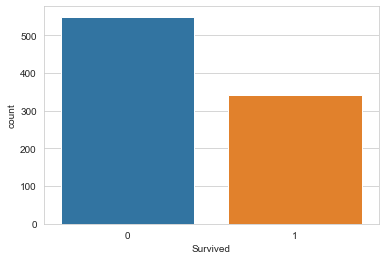

In [39]:
sns.countplot(x='Survived',data=train)

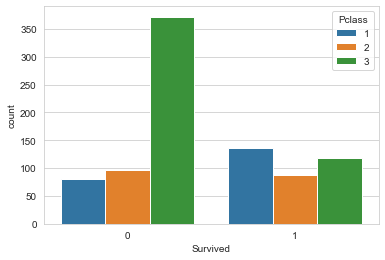

In [40]:
#Class has big impact on survived
sns.countplot(x='Survived',data=train,hue='Pclass')

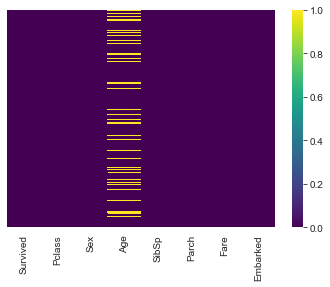

In [41]:
#Age and Cabin has lots of nan values
sns.heatmap(data=train.isnull(),yticklabels=False,cmap='viridis')

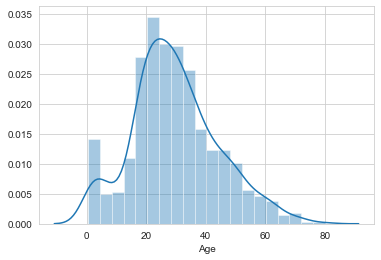

In [42]:
sns.distplot(train['Age'])

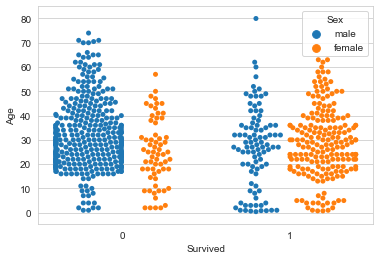

In [43]:
sns.swarmplot(x='Survived',y='Age',data=train,hue='Sex',dodge=True)

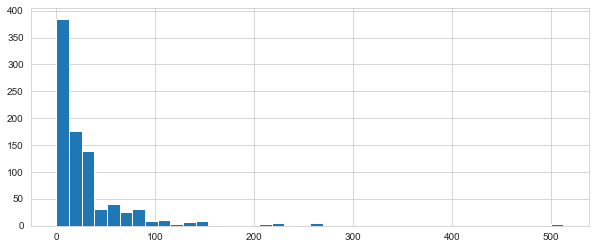

In [44]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [46]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [47]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [48]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [50]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [51]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Handling NaN variables

In [52]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit_transform(train['Age'].values.reshape(train['Age'].shape[0],1))
train['Age'] = imputer

In [53]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [54]:
train.dropna(inplace=True)

### Converting data

In [55]:
train['Sex'].nunique()

2

In [58]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'Q': 1,'C': 2} ).astype(int)

In [59]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [60]:
X = train.drop('Survived',axis=1)
y = train['Survived']

# Model, predict and solve

### Split test/train data 

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Logistic Regression

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predictions = logmodel.predict(X_test)

In [104]:
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Score:",round(logmodel.score(X_train, y_train)*100,2))
acc_log = round(logmodel.score(X_train, y_train) * 100, 2)

Confusion Matrix
 [[149  14]
 [ 33  71]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

Score: 80.23


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.

In [65]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logmodel.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.491495
6,Embarked,0.196808
5,Fare,0.001734
2,Age,-0.038199
4,Parch,-0.099556
3,SibSp,-0.235685
0,Pclass,-1.012132


###  Support Vector Machines


In [74]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

In [97]:
print("Confusion Matrix\n",confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
print("Score:",round(svc.score(X_train, y_train)*100,2))
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

Confusion Matrix
 [[117  46]
 [ 37  67]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       163
           1       0.59      0.64      0.62       104

    accuracy                           0.69       267
   macro avg       0.68      0.68      0.68       267
weighted avg       0.69      0.69      0.69       267

Score: 68.97


NameError: name 'Y_train' is not defined

### KNN

In [96]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [79]:
print("Confusion Matrix\n",confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
print("Score:",round(knn.score(X_train, y_train)*100,2))

Confusion Matrix
 [[117  46]
 [ 37  67]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       163
           1       0.59      0.64      0.62       104

    accuracy                           0.69       267
   macro avg       0.68      0.68      0.68       267
weighted avg       0.69      0.69      0.69       267

Score: 84.89


### Gaussian Naive Bayes


In [81]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.46

### Decision Tree

In [83]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.87

### Random Forest


In [85]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.87

In [105]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn,acc_log,
              acc_random_forest, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.87
5,Decision Tree,98.87
1,KNN,84.89
2,Logistic Regression,80.23
4,Naive Bayes,78.46
0,Support Vector Machines,68.97
